In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import tensorflow as tf
from dsn.train_dsn import train_dsn
from dsn.util.systems import V1Circuit
from dsn.util.dsn_util import get_savedir, \
                              get_system_from_template, \
                              get_arch_from_template, \
                              get_ME_model
from dsn.util.plot_util import assess_constraints_mix, plot_opt, dsn_pairplots, \
                               pairplot, lin_reg_plot
from tf_util.stat_util import approx_equal
import matplotlib.backends.backend_pdf
from sklearn import linear_model
from dsn.util.plot_util import PCA

import os

os.chdir('../../')

In [2]:
variance = 0.1
c_init_order = 0
start_rs = 1
num_rs = 1

repeats = 1
sigma_init = 1.0
nlayers = 2
upl = 10

sysname = 'LRRNN'
dirstr = sysname
rank = 1
input_type = 'input'
behavior_type = 'BI'
param_dict = {'rank':rank,
              'input_type':input_type,
              'behavior_type':behavior_type,
              'solve_its':50,
              'variance':variance,
              'gauss_newton':False,
              'solve_eps':0.2}
system = get_system_from_template(sysname, param_dict)

alpha=0.05
frac_samps=0.2
tol = []
tol_inds = []

conv_dict = {
    'alpha':alpha,
    'frac_samples':frac_samps,
    'tol_inds':[],
}

best_models = []
ME_its = []

arch_params = {
               'D':system.D,
               'sigma_init':sigma_init,
               'repeats':repeats,
               'nlayers':nlayers,
               'upl':upl,
              }

param_dict.update(arch_params)
arch_dict = get_arch_from_template(system, param_dict)

model_dirs = []
for rs in range(start_rs, start_rs+num_rs):
    model_dirs.append(get_savedir(system, arch_dict, c_init_order, rs, dirstr))
legendstrs = np.arange(start_rs, start_rs+num_rs)
figs, ME_its = plot_opt(model_dirs, legendstrs=legendstrs, con_method='mix',
                        alpha=alpha, frac_samps=frac_samps, \
                        tol=tol, tol_inds=tol_inds, maxconlim=1)
print(ME_its)


NotImplementedError: 

0
dist (300, 3)
1
dist (300, 3)
2
dist (300, 3)
3
dist (300, 3)
4
dist (300, 3)


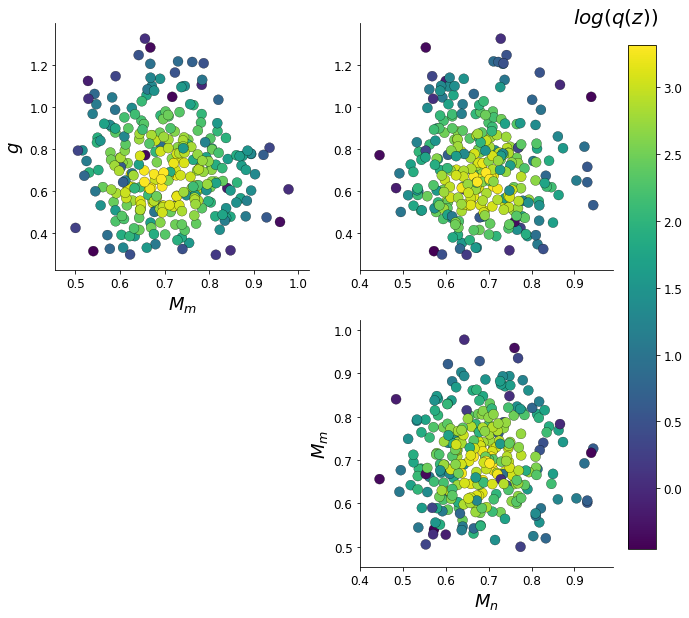

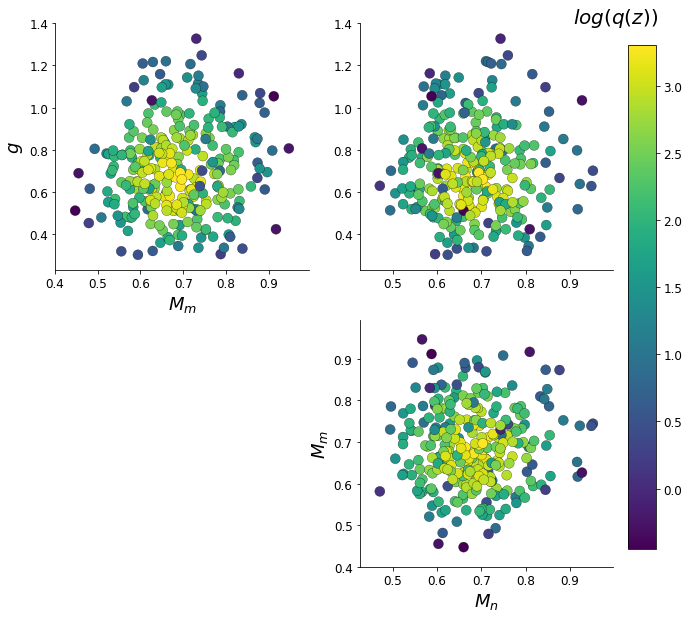

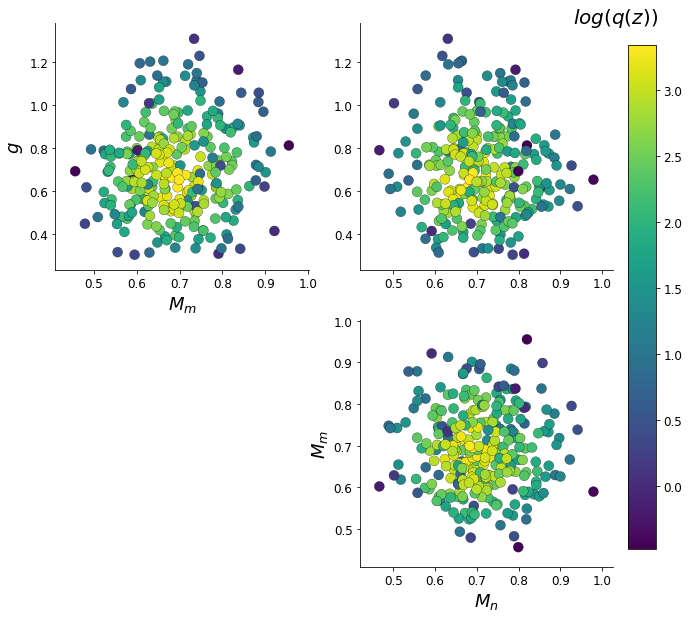

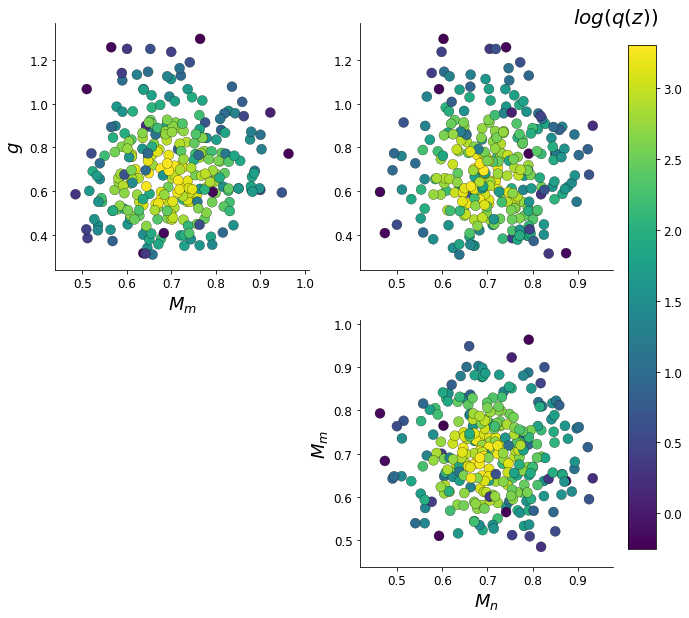

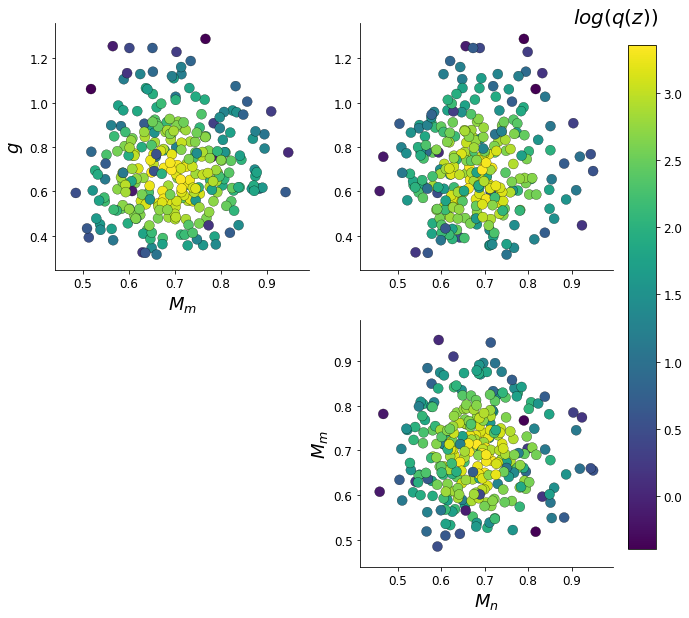

In [24]:
ME_its = 5*[0]
Zs, log_q_zs, axs = dsn_pairplots(model_dirs, 'Zs', system, AL_final_its=ME_its, fontsize=18,
                                  c_str='log_q_z', outlier_stds=2)

0
dist (300, 3)


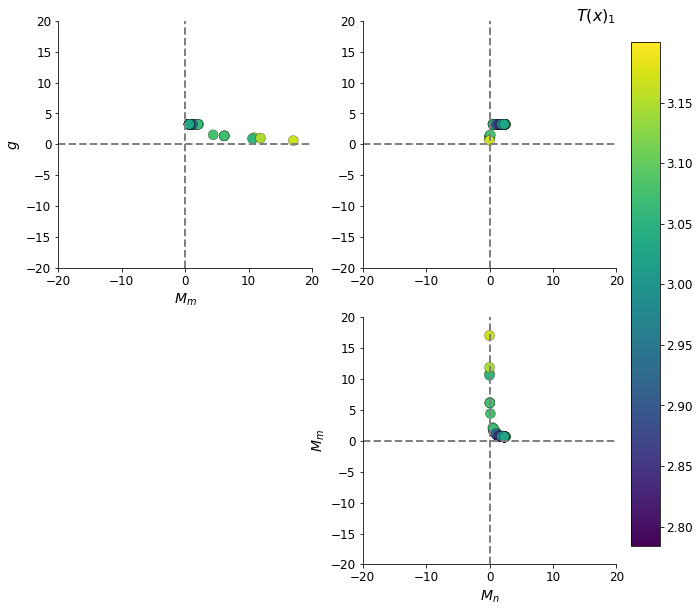

In [11]:
Zs, gammas, axs = dsn_pairplots(model_dirs, 'Zs', system, AL_final_its=ME_its, c_str='T_x1', outlier_stds=2,
                               xlims=[-20, 20], ylims=[-20, 20])

0
dist (300, 4)


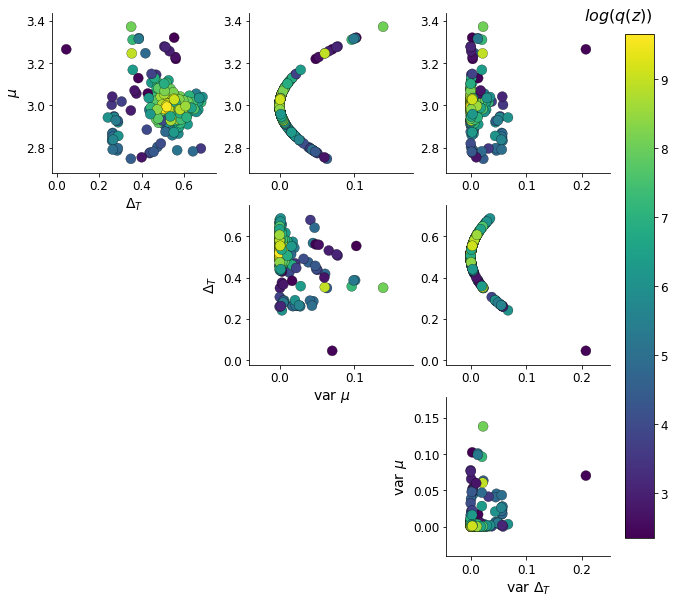

In [13]:

_, _, axs = dsn_pairplots(model_dirs, 'T_xs', system, ME_its)


### New pretty plots

In [9]:
from dsn.util.dsn_util import load_DSNs
sessions, tf_vars, feed_dicts = load_DSNs(model_dirs, ME_its)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from models/V1Circuit/V1Circuit_h_RUNE_h_RUNP_h_RUNS_h_RUNV_S_diff_5.00E-01_1.00E-04_flow=1R_4M_2L_10U_M_A_c=5_rs=1/model-4
Loaded DGM in 1.89 seconds


In [10]:
sess = sessions[0]
tf_var = tf_vars[0]
feed_dict = feed_dicts[0]

[-5. -5. -5. -5.] [5. 5. 5. 5.]


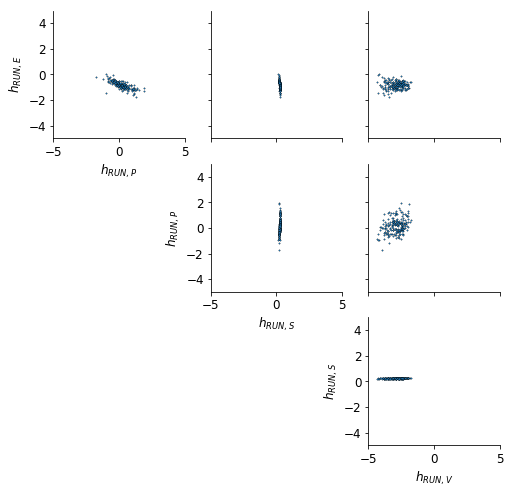